In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dask import bag
from tqdm import tqdm
from PIL import Image, ImageDraw

In [3]:
x = [] 

In [2]:
def entropy_it(x):
    counts = np.bincount(x)
    p = counts[counts > 0] / float(len(x))
    # compute Shannon entropy in bits
    return -np.sum(p * np.log2(p))

def draw_it(strokes):
    image = Image.new("P", (256,256), color=255)
    draw = ImageDraw.Draw(image)
    for stroke in ast.literal_eval(strokes):
        for i in range(len(stroke[0])-1):
            draw.line([stroke[0][i], stroke[1][i], stroke[0][i+1], stroke[1][i+1]], fill=0, width=5)
    image = np.array(image)
    return entropy_it(image.flatten()), image

def plot_it(entropy, images, indices, n=2):
    fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(12, 10))
    for i, j in enumerate(indices[0][:n*n]):
        ax = axs[i // n, i % n]
#         ax.set_title("%.4f" % entropy[j])
        ax.imshow(images[j], cmap="gray")
#         ax.set_yticks([])
#         ax.set_xticks([])
    plt.subplots_adjust(bottom=-0.2)
    plt.show()

In [15]:
full_df = pd.read_csv('/home/doodle/pedro/data/training_data_subsampled/airplane.csv', index_col=['key_id'])

In [18]:
full_df.sort_values("difficulty", inplace=True)

In [3]:
df1 = pd.read_csv('/home/doodle/pedro/data/training_data_subsampled/trumpet.csv', index_col=['key_id'])
df2 = pd.read_csv('/home/doodle/pedro/data/training_data_subsampled/cloud.csv', index_col=['key_id'])

In [12]:
df = pd.concat([df1[:2],df2[:3]]) 
data = []
entropybag = bag.from_sequence(df.drawing.values).map(draw_it)
data.extend(entropybag.compute()) # PARALLELIZE

entropy, images = zip(*data)

In [5]:
threshold = 1
lower = np.percentile(entropy, threshold)
upper = np.percentile(entropy, 100 - threshold)
print(np.min(entropy), np.max(entropy))
print(lower, upper)

0.19469173571297363 0.4314463809445273
0.1982902810393756 0.4297898804919372


In [22]:
upper

0.47570131312065606

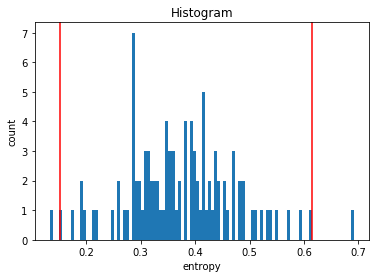

In [7]:
plt.title("Histogram")
plt.xlabel('entropy')
plt.ylabel('count')
plt.hist(entropy, bins=100)
plt.axvline(x=lower, color='r')
plt.axvline(x=upper, color='r')

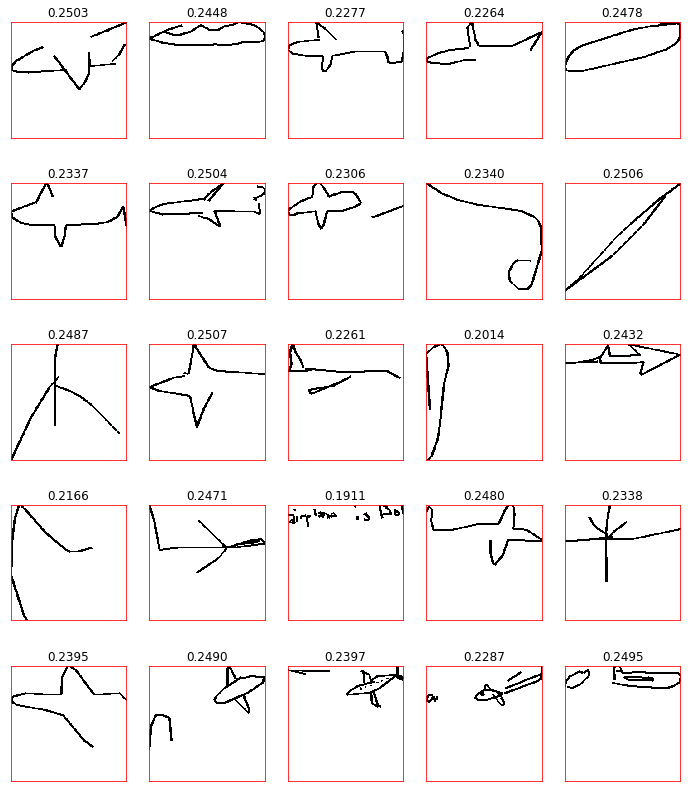

In [31]:
plot_it(entropy, images, np.where(entropy < lower))

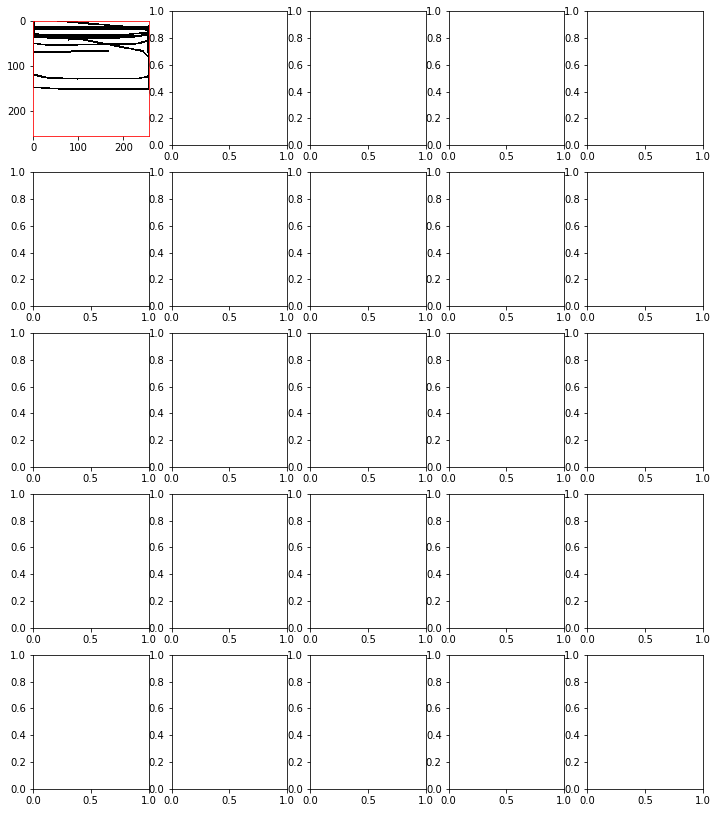

In [10]:
plot_it(entropy, images, np.where(entropy > upper))

In [24]:
entropy

(0.2236926118983412,
 0.55928994416266,
 0.37801973570391323,
 0.36901826562493323)

In [25]:
np.where(entropy <= upper)

(array([0, 2, 3]),)

In [9]:
upper

0.4297898804919372

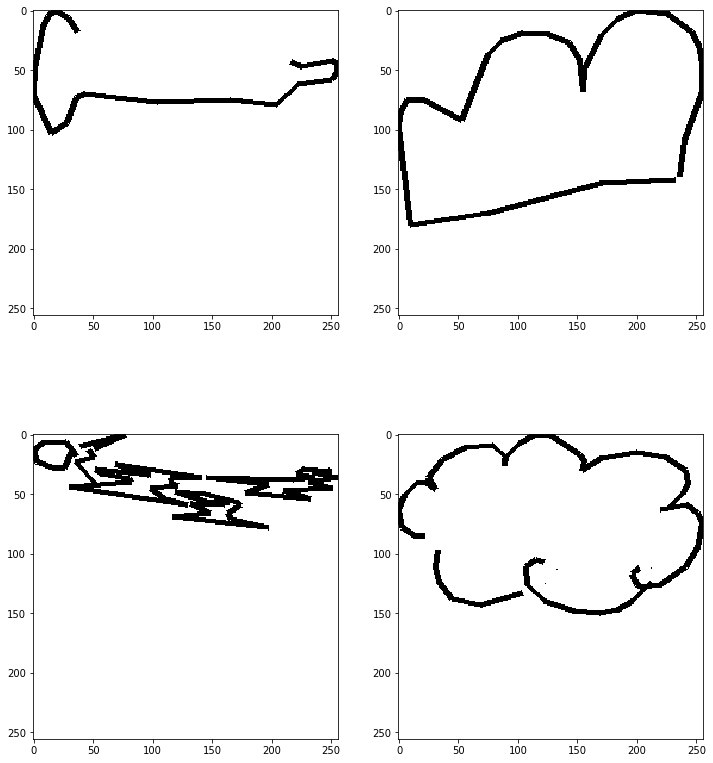

In [13]:
plot_it(entropy, images, np.where(entropy <= upper))